In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-2023-2024-season-stats/NBA_2023_2024_Stats.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv("/kaggle/input/nba-2023-2024-season-stats/NBA_2023_2024_Stats.csv")

In [4]:
df.head()

,Player_ID,Player_Name,Age,Team_Name,Position,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,...,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Total_Points
0,1,Luka Doncic,24,DAL,PG,70,70,2624,804,1652,...,0.786,59,588,647,686,99,38,282,149,2370
1,2,Shai Gilgeous-Alexander,25,OKC,PG,75,75,2553,796,1487,...,0.874,65,350,415,465,150,67,162,184,2254
2,3,Giannis Antetokounmpo,29,MIL,PF,73,73,2567,837,1369,...,0.657,196,645,841,476,87,79,250,210,2222
3,4,Jalen Brunson,27,NYK,PG,77,77,2726,790,1648,...,0.847,43,235,278,519,70,13,186,144,2212
4,5,Nikola Jokic,28,DEN,C,79,79,2737,822,1411,...,0.817,223,753,976,708,108,68,237,194,2085


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player_ID                          571 non-null    int64  
 1   Player_Name                        571 non-null    object 
 2   Age                                571 non-null    int64  
 3   Team_Name                          571 non-null    object 
 4   Position                           571 non-null    object 
 5   Games_Played                       571 non-null    int64  
 6   Games_Started                      571 non-null    int64  
 7   Minutes_Played                     571 non-null    int64  
 8   Field_Goals                        571 non-null    int64  
 9   Field_Goals_Attempted              571 non-null    int64  
 10  Field_Goal_Percentage              568 non-null    float64
 11  Three_Point_Field_Goals            571 non-null    int64  

In [6]:
df.fillna(-1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player_ID                          571 non-null    int64  
 1   Player_Name                        571 non-null    object 
 2   Age                                571 non-null    int64  
 3   Team_Name                          571 non-null    object 
 4   Position                           571 non-null    object 
 5   Games_Played                       571 non-null    int64  
 6   Games_Started                      571 non-null    int64  
 7   Minutes_Played                     571 non-null    int64  
 8   Field_Goals                        571 non-null    int64  
 9   Field_Goals_Attempted              571 non-null    int64  
 10  Field_Goal_Percentage              571 non-null    float64
 11  Three_Point_Field_Goals            571 non-null    int64  

In [8]:
df.columns

Index(['Player_ID', 'Player_Name', 'Age', 'Team_Name', 'Position',
       'Games_Played', 'Games_Started', 'Minutes_Played', 'Field_Goals',
       'Field_Goals_Attempted', 'Field_Goal_Percentage',
       'Three_Point_Field_Goals', 'Three_Point_Field_Goals_Attempted',
       'Three_Point_Field_Goal_Percentage', 'Two_Point_Field_Goals',
       'Two_Point_Field_Goals_Attempted', 'Two_Point_Field_Goal_Percentage',
       'Effective_Field_Goal_Percentage', 'Free_Throws',
       'Free_Throws_Attempted', 'Free_Throw_Percentage', 'Offensive_Rebounds',
       'Defensive_Rebounds', 'Total_Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal_Fouls', 'Total_Points'],
      dtype='object')

In [9]:
selected_features = [
    'Total_Points', 'Assists', 'Rebounds', 'Steals', 'Blocks', 
    'Field_Goal_Percentage', 'Three_Point_Field_Goal_Percentage', 
    'Effective_Field_Goal_Percentage', 'Minutes_Played', 
    'Turnovers', 'Personal_Fouls'
]

In [10]:
df.describe()

,Player_ID,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_Field_Goals,Three_Point_Field_Goals_Attempted,...,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Total_Points
count,571.000000,571.00000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,286.000000,25.74606,46.232925,21.541156,1039.802102,181.679510,383.015762,0.445117,55.304729,151.234676,...,0.643079,45.467601,142.119089,187.586690,114.903678,32.201401,22.152364,55.577933,80.690018,492.049037
std,164.977776,4.22818,25.488147,26.915390,847.527648,185.938994,382.565754,0.149978,63.570668,165.556025,...,0.440936,51.227634,141.162355,185.753017,134.273939,28.620133,28.849329,57.246425,64.119463,509.311532
min,1.000000,19.00000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143.500000,23.00000,22.000000,0.000000,225.500000,29.000000,67.500000,0.408000,3.000000,13.500000,...,0.667000,9.000000,27.000000,37.500000,17.000000,7.000000,3.000000,9.000000,20.000000,78.000000
50%,286.000000,25.00000,51.000000,7.000000,880.000000,115.000000,240.000000,0.452000,28.000000,87.000000,...,0.761000,30.000000,106.000000,141.000000,67.000000,27.000000,13.000000,37.000000,72.000000,310.000000
75%,428.500000,28.00000,69.000000,41.500000,1783.500000,295.500000,615.000000,0.500000,88.000000,241.000000,...,0.833000,62.000000,212.500000,273.000000,159.000000,51.000000,33.000000,87.000000,128.000000,786.000000
max,571.000000,39.00000,84.000000,82.000000,2989.000000,837.000000,1652.000000,0.747000,357.000000,876.000000,...,1.000000,335.000000,826.000000,1120.000000,752.000000,150.000000,254.000000,282.000000,254.000000,2370.000000


In [11]:
df.head()

,Player_ID,Player_Name,Age,Team_Name,Position,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,...,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Total_Points
0,1,Luka Doncic,24,DAL,PG,70,70,2624,804,1652,...,0.786,59,588,647,686,99,38,282,149,2370
1,2,Shai Gilgeous-Alexander,25,OKC,PG,75,75,2553,796,1487,...,0.874,65,350,415,465,150,67,162,184,2254
2,3,Giannis Antetokounmpo,29,MIL,PF,73,73,2567,837,1369,...,0.657,196,645,841,476,87,79,250,210,2222
3,4,Jalen Brunson,27,NYK,PG,77,77,2726,790,1648,...,0.847,43,235,278,519,70,13,186,144,2212
4,5,Nikola Jokic,28,DEN,C,79,79,2737,822,1411,...,0.817,223,753,976,708,108,68,237,194,2085


In [12]:
df['game_start_percentage'] = df['Games_Started']/df['Games_Played']

In [13]:
# Calculate per-36 stats for the specified columns
df['Points_per36'] = (df['Total_Points'] / df['Minutes_Played']) * 36
df['Assists_per36'] = (df['Assists'] / df['Minutes_Played']) * 36
df['Rebounds_per36'] = (df['Total_Rebounds'] / df['Minutes_Played']) * 36
df['Fouls_per36'] = (df['Personal_Fouls'] / df['Minutes_Played']) * 36
df['Blocks_per36'] = (df['Blocks'] / df['Minutes_Played']) * 36
df['Steals_per36'] = (df['Steals'] / df['Minutes_Played']) * 36
df['3pA_per36'] = (df['Three_Point_Field_Goals_Attempted']/df['Minutes_Played']) * 36
df['2pA_per36'] = (df['Two_Point_Field_Goals_Attempted']/df['Minutes_Played']) * 36
df['FTA_per36'] = (df['Free_Throws_Attempted']/df['Minutes_Played']) * 36

# Fill NaN values (e.g., for players with no minutes played) with 0 or a placeholder
df[['Points_per36', 'Assists_per36', 'Rebounds_per36', 'Fouls_per36', 'Blocks_per36', 'Steals_per36']] = df[
    ['Points_per36', 'Assists_per36', 'Rebounds_per36', 'Fouls_per36', 'Blocks_per36', 'Steals_per36']
].fillna(0)


In [14]:
features = [
       'game_start_percentage',
       'Field_Goals_Attempted', 'Field_Goal_Percentage',
       '3pA_per36',
       'Three_Point_Field_Goal_Percentage', 
       '2pA_per36', 'Two_Point_Field_Goal_Percentage',
       'Effective_Field_Goal_Percentage',
       'FTA_per36', 'Free_Throw_Percentage','Points_per36', 'Assists_per36', 'Rebounds_per36', 'Fouls_per36', 'Blocks_per36', 'Steals_per36']
# Index(['Player_ID', 'Player_Name', 'Age', 'Team_Name', 'Position',
#        'Games_Played', 'Games_Started', 'Minutes_Played', 'Field_Goals',
#        'Field_Goals_Attempted', 'Field_Goal_Percentage',
#        'Three_Point_Field_Goals', 'Three_Point_Field_Goals_Attempted',
#        'Three_Point_Field_Goal_Percentage', 'Two_Point_Field_Goals',
#        'Two_Point_Field_Goals_Attempted', 'Two_Point_Field_Goal_Percentage',
#        'Effective_Field_Goal_Percentage', 'Free_Throws',
#        'Free_Throws_Attempted', 'Free_Throw_Percentage', 'Offensive_Rebounds',
#        'Defensive_Rebounds', 'Total_Rebounds', 'Assists', 'Steals', 'Blocks',
#        'Turnovers', 'Personal_Fouls', 'Total_Points'],
#       dtype='object')

In [15]:
df_train = df[features]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
stats_scaled=pd.DataFrame(scaler.fit_transform(df_train))
stats_scaled.columns=df_train.columns

In [17]:
from sklearn.decomposition import PCA
n_components=df_train.shape[1]
pca = PCA(n_components=n_components, random_state=123)
pca.fit(stats_scaled)

PCA(n_components=16, random_state=123)

In [18]:
explained_variance_ratio = pca.explained_variance_ratio_ 
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
lst = []
for i in range (0, n_components):
    lst.append([i+1, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])

pca_predictor = pd.DataFrame(lst)
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.480335,0.480335
1,2,0.141418,0.621753
2,3,0.112002,0.733755
3,4,0.057275,0.791030
4,5,0.050069,0.841099
5,6,0.036141,0.877240
6,7,0.028756,0.905996
7,8,0.024030,0.930026
8,9,0.020598,0.950624
9,10,0.016064,0.966687


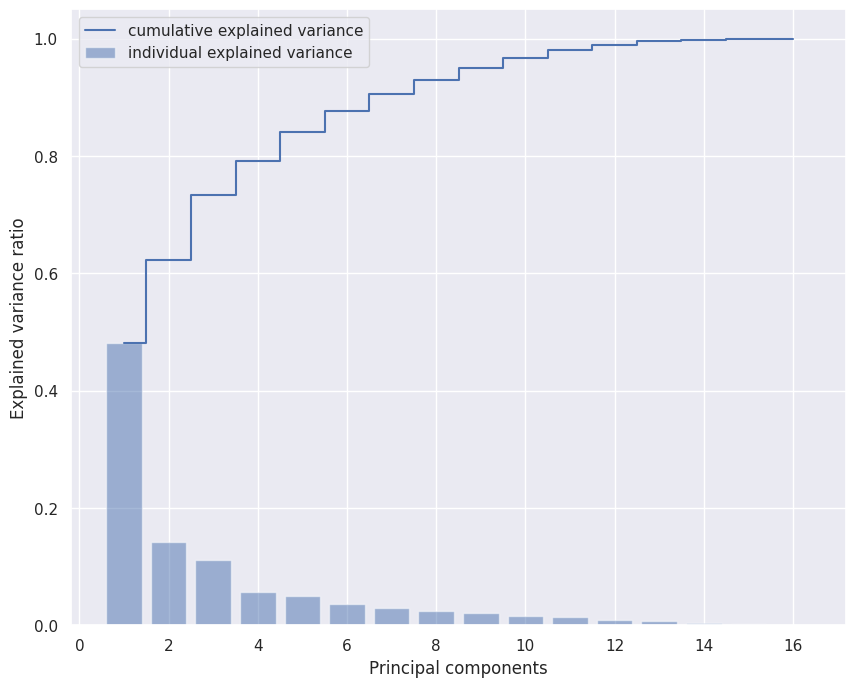

In [19]:
plt.subplots(figsize=(10,8))

plt.bar(pca_predictor['Component'],pca_predictor['Explained Variance'], align='center', alpha=0.5, 
       label='individual explained variance')
plt.step(pca_predictor['Component'],pca_predictor['Cumulative Explained Variance'], where='mid',
         label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio');
plt.legend(loc='best')

In [20]:
pca = PCA(n_components=8)
pca.fit(stats_scaled)

PCA(n_components=8)

In [21]:
stats_transformed = pca.fit_transform(stats_scaled)
stats_transformed.shape

(571, 8)

In [22]:
from sklearn.cluster import KMeans

n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(stats_transformed)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=123)

In [23]:
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

In [24]:
cluster_labels

array([6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 1, 1, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 6,
       6, 6, 1, 6, 5, 6, 1, 6, 6, 1, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 1, 0, 6, 2, 0, 6, 1, 6, 0, 5, 5, 1, 0, 6, 6, 6, 6, 1, 6, 1,
       1, 6, 6, 1, 6, 5, 5, 6, 0, 6, 5, 6, 0, 5, 5, 1, 6, 1, 5, 6, 5, 5,
       6, 5, 6, 6, 5, 2, 5, 1, 6, 6, 5, 6, 5, 5, 1, 1, 1, 1, 5, 1, 6, 1,
       6, 0, 1, 5, 5, 5, 0, 6, 5, 1, 2, 5, 2, 5, 0, 5, 5, 6, 5, 6, 6, 5,
       5, 2, 1, 5, 0, 6, 5, 1, 5, 5, 2, 0, 5, 5, 5, 5, 5, 1, 2, 2, 2, 5,
       2, 0, 1, 5, 0, 5, 0, 5, 0, 2, 0, 5, 1, 0, 0, 2, 0, 5, 2, 2, 0, 5,
       6, 0, 5, 2, 0, 0, 0, 0, 5, 0, 2, 5, 1, 0, 1, 0, 6, 0, 0, 1, 1, 5,
       0, 0, 2, 5, 2, 5, 5, 0, 5, 0, 5, 0, 0, 2, 6, 5, 5, 0, 5, 5, 0, 2,
       2, 2, 0, 0, 5, 2, 2, 5, 0, 0, 5, 0, 5, 2, 0, 5, 2, 2, 5, 2, 2, 5,
       5, 0, 0, 0, 5, 2, 5, 5, 5, 5, 2, 5, 0, 2, 5, 0, 0, 0, 0, 5, 0, 5,
       5, 6, 2, 0, 2, 2, 0, 0, 5, 2, 5, 0, 2, 2, 5,

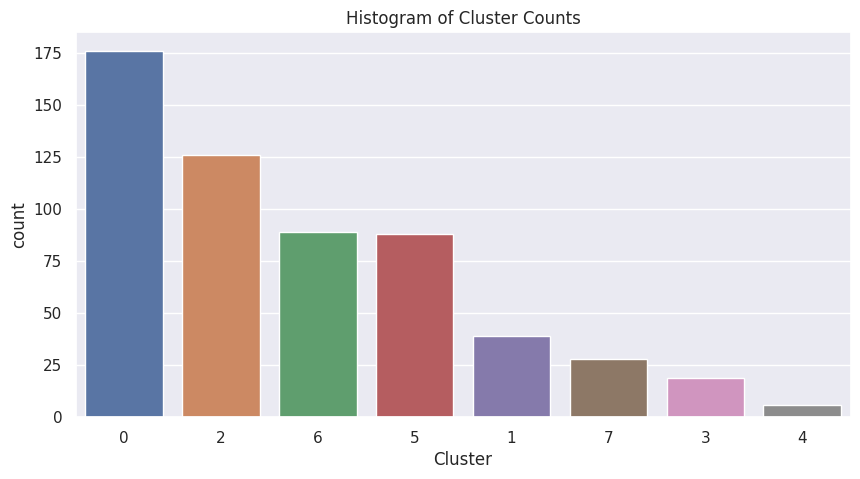

In [25]:
cluster_labels_series = pd.Series(cluster_labels, name="Cluster")

ax=plt.subplots(figsize=(10,5))
ax = sns.countplot(data=cluster_labels_series.to_frame(), x="Cluster", order=cluster_labels_series.value_counts().index)

title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [26]:
def cluster_stats(columns):
    output = pd.DataFrame({'cluster':[ i for i in range(n_clusters)]})
    for column in columns:
        lst = []
        for i in range(n_clusters):
            mean = df[df['cluster'] == i].describe()[column]['mean']
            lst.append([i, round(mean,2)])
        df2 = pd.DataFrame(lst)
        df2.columns = ['cluster', column]
        output = pd.merge(output, df2, on='cluster', how='outer')
    return output

In [27]:
columns = df_train.columns
cluster_stats(columns)

,cluster,game_start_percentage,Field_Goals_Attempted,Field_Goal_Percentage,3pA_per36,Three_Point_Field_Goal_Percentage,2pA_per36,Two_Point_Field_Goal_Percentage,Effective_Field_Goal_Percentage,FTA_per36,Free_Throw_Percentage,Points_per36,Assists_per36,Rebounds_per36,Fouls_per36,Blocks_per36,Steals_per36
0,0,0.06,207.32,0.40,6.67,0.33,5.43,0.49,0.50,2.16,0.76,13.63,3.24,5.04,2.91,0.49,1.10
1,1,0.97,698.95,0.57,2.28,0.14,10.38,0.61,0.60,4.31,0.73,18.12,3.39,10.48,3.24,1.53,1.00
2,2,0.09,165.82,0.50,2.41,0.27,7.59,0.56,0.53,2.95,0.68,12.63,2.95,8.57,3.79,1.26,1.23
3,3,0.17,51.05,0.51,0.00,-1.00,8.23,0.51,0.51,4.76,0.64,11.88,2.99,11.60,4.17,1.18,1.56
4,4,0.00,1.33,-0.50,0.80,-0.83,5.00,-0.67,-0.50,0.00,-1.00,0.00,2.03,1.07,3.67,0.00,0.27
5,5,0.54,490.48,0.45,5.51,0.36,6.16,0.54,0.54,2.35,0.77,14.43,3.62,5.45,2.76,0.59,1.15
6,6,0.97,1007.01,0.47,6.66,0.37,9.83,0.53,0.55,4.17,0.83,21.39,5.16,5.45,2.36,0.56,1.13
7,7,0.00,10.64,0.37,5.24,0.08,8.65,0.45,0.42,0.00,-1.00,11.56,3.37,5.96,2.94,0.87,1.36


In [32]:
df[df['cluster']==4]

,Player_ID,Player_Name,Age,Team_Name,Position,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,...,Points_per36,Assists_per36,Rebounds_per36,Fouls_per36,Blocks_per36,Steals_per36,3pA_per36,2pA_per36,FTA_per36,cluster
562,563,Ryan Arcidiacono,29,NYK,PG,20,0,45,0,6,...,0.0,3.2,6.4,4.0,0.0,1.6,4.8,0.0,0.0,4
563,564,Malcolm Cazalon,22,DET,SG,1,0,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
564,565,Jalen Crutcher,24,NOP,PG,1,0,3,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,4
568,569,Ron Harper Jr.,23,TOR,PF,1,0,4,0,0,...,0.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,4
569,570,Justin Jackson,28,MIN,SF,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
570,571,Dmytro Skapintsev,25,NYK,C,2,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,4



Cluster 0 represents bench players with limited starting roles, characterized by a low game start percentage (0.06) and low shot volume, with moderate field goals attempted (207.32) and below-average efficiency (Field Goal Percentage of 0.40). These players contribute in a balanced manner, providing moderate scoring (Points per 36 = 13.63), playmaking (Assists per 36 = 3.24), and defensive efforts (Rebounds per 36 = 5.04, Steals per 36 = 1.10). 

Cluster 1 features high-impact starters or key players with a high game start percentage (0.97) and very high shot volume (Field Goals Attempted = 698.95). They are highly efficient (Field Goal Percentage = 0.57, Effective Field Goal Percentage = 0.60) and excel across the board with strong scoring (Points per 36 = 18.12), rebounding (Rebounds per 36 = 10.48), and decent defensive contributions (Blocks per 36 = 1.53, Steals per 36 = 1.00).

Cluster 2 includes bench or role players with a low game start percentage (0.09) but moderate efficiency (Field Goal Percentage = 0.50). These players offer balanced contributions in scoring (Points per 36 = 12.63), playmaking (Assists per 36 = 2.95), rebounding, and defense.

Cluster 3 represents occasional starters with a game start percentage of 0.17, who focus on rebounding (Rebounds per 36 = 11.60) and play aggressively, as indicated by their high fouls (Fouls per 36 = 4.17), but have a low scoring output (Points per 36 = 11.88). 

Cluster 4 consists of irregular players with no starting roles (game start percentage = 0.00), showing very poor efficiency and minimal contributions, with negative field goal percentages and outlier values possibly indicating data issues or extremely limited playing time.

Cluster 5 highlights rotational players with a moderate game start percentage (0.54). These players exhibit balanced performances with good scoring (Points per 36 = 14.43), playmaking (Assists per 36 = 3.62), and solid defensive efforts (Steals per 36 = 1.15).

Cluster 6 features high-impact starters (game start percentage = 0.97) who are top scorers (Points per 36 = 21.39) and versatile contributors with decent rebounding (Rebounds per 36 = 5.45) and moderate defensive skills.

Finally, Cluster 7 includes rarely used players with no starting roles (game start percentage = 0.00), characterized by low efficiency and scoring, with limited contributions across all metrics.